In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
from plotnine.data import mpg

# Daten einlesen
## Aufgabe 1a 
Lies die Daten aus dem beigelegten Excel-File ’diabetes.xlsx’ ein. Lies dazu auch die beigefügte
Beschreibung der einzelnen Merkmale und versuche diese ganz grob zu verstehen.


In [2]:
data = pd.read_excel('diabetes.xlsx', sheet_name='data', skiprows = 2)
data.head()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [93]:
# Spaltennamen printen
for i in data.columns:
    print(i)

n_pregnant
gtt
blood_pressure
triceps_skin_fold_thickness
insulin
bmi
dpf
age
class


## Aufgabe 1b
 Welche Merkmale sind diskret, welche stetig? Handelt es sich konkret um nominal-, ordinal-, intervalloder verhältnisskalierte Merkmale?


stetig:
- bmi
- dpf

diskret:
- n_pregnant
- age
- class

# Exploration
## Aufgabe 2a 
Untersuche zuerst die Verteilungen der einzelnen Merkmale, jedes für sich. Gibt es auffällige Werte,
die auf Datenfehler, Ausreisser oder fehlende Werte hinweisen?


In [4]:
# Überprüfen ob die Dataframe NaN Werte beinhaltet
print(data.isnull().values.any())

False


## Histogramme & Boxplots

In [5]:
data.describe()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


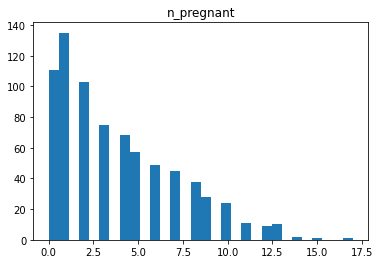

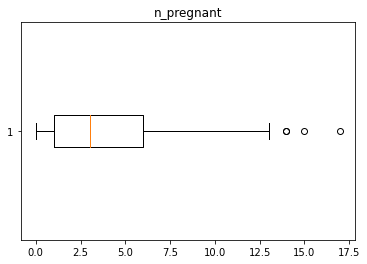

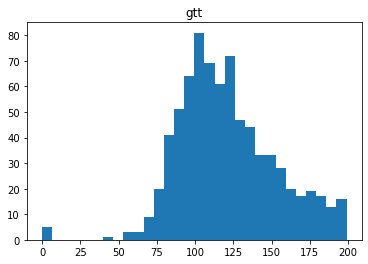

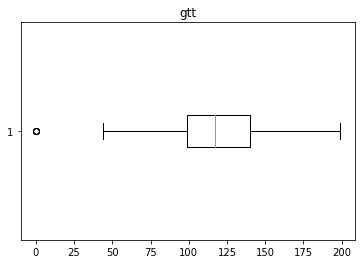

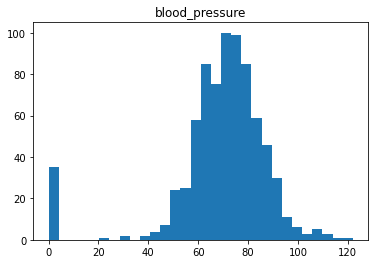

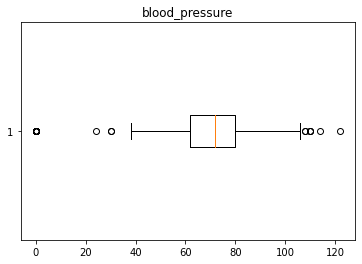

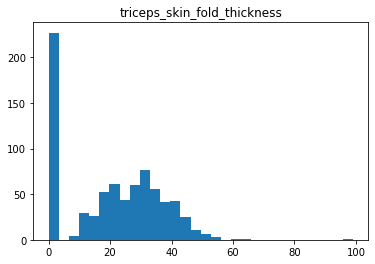

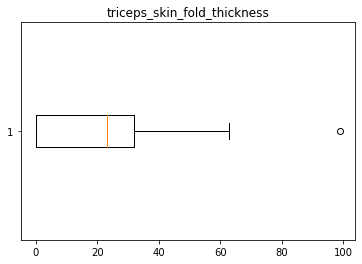

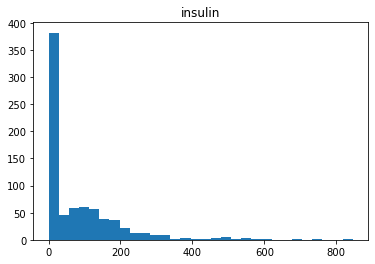

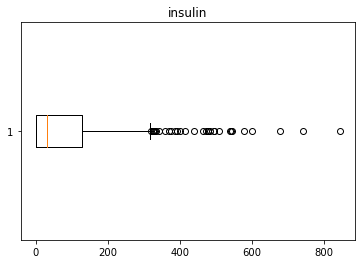

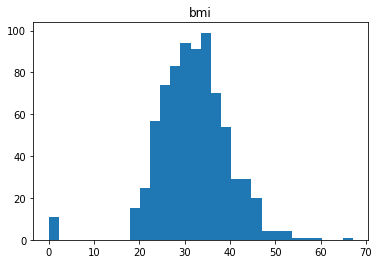

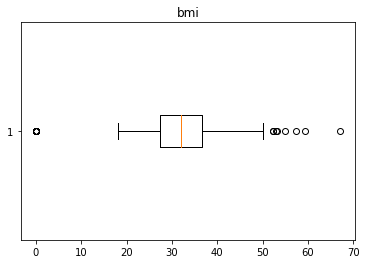

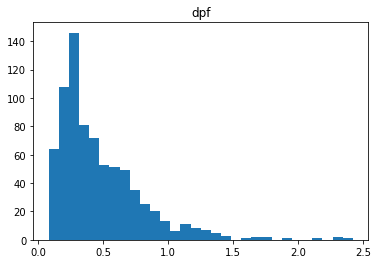

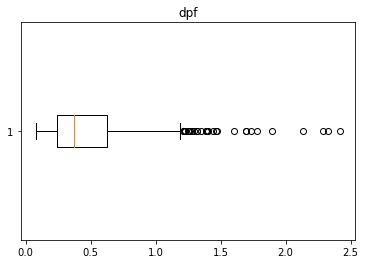

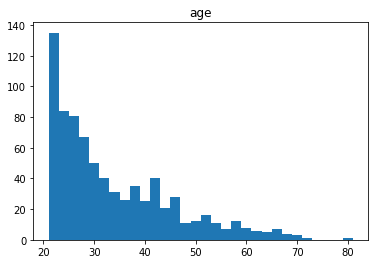

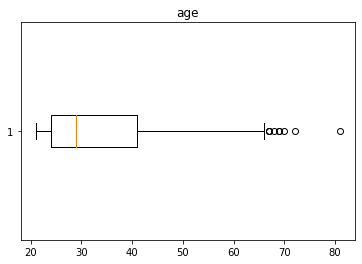

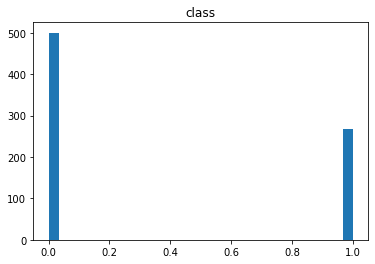

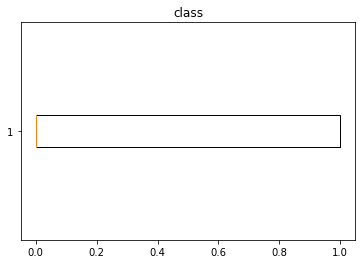

In [6]:
def gen_hist(df, column):
    plt.hist(df[column], bins=30)
    plt.title(column)
    plt.show()

def gen_boxplot(df, column):
    plt.boxplot(df[column], vert = False)
    plt.title(column)
    plt.show()

for i in data:
    gen_hist(data, i)
    gen_boxplot(data, i)

In [61]:
def count_zero(df, column):
    print(column, (df[column] == 0).sum())
    
for i in data:
    count_zero(data, i)

n_pregnant 111
gtt 5
blood_pressure 35
triceps_skin_fold_thickness 227
insulin 373
bmi 11
dpf 0
age 0
class 500


In [8]:
# show rows where gtt is 0
data[data['gtt'] == 0]

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
74,1,0,48,20,0,24.7,0.140,22,0
181,1,0,74,20,23,27.7,0.299,21,0
341,1,0,68,35,0,32.0,0.389,22,0
348,5,0,80,32,0,41.0,0.346,37,1
501,6,0,68,41,0,39.0,0.727,41,1


# Aufgabe 2b
Stelle sicher, dass alle fehlenden Werte sauber mit ‘NaN‘ markiert sind und stelle die Verteilung der
einzelnen Merkmale danach noch einmal graphisch mit Histogrammen dar.

In [62]:
# Neuer Dataframe ohne n_pregnant & class --> diese Variablen dürfen 0 Werte besitzen
data_new = data.iloc[:,1:8]

# 0 Werte mit NaN ersetzen
data_new.replace(0, np.nan, inplace=True)
data_new.head()

,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age
0,85.0,66.0,29.0,NaN,26.6,0.351,31
1,183.0,64.0,NaN,NaN,23.3,0.672,32
2,89.0,66.0,23.0,94.0,28.1,0.167,21
3,137.0,40.0,35.0,168.0,43.1,2.288,33
4,116.0,74.0,NaN,NaN,25.6,0.201,30


In [63]:
# n_pregnant & class wieder hinzufügen
data_new[["n_pregnant", "class"]] = data[["n_pregnant", "class"]]
data_new.head()

,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,n_pregnant,class
0,85.0,66.0,29.0,NaN,26.6,0.351,31,1,0
1,183.0,64.0,NaN,NaN,23.3,0.672,32,8,1
2,89.0,66.0,23.0,94.0,28.1,0.167,21,1,0
3,137.0,40.0,35.0,168.0,43.1,2.288,33,0,1
4,116.0,74.0,NaN,NaN,25.6,0.201,30,5,0


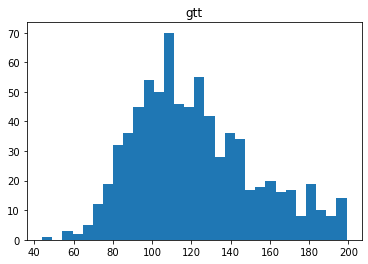

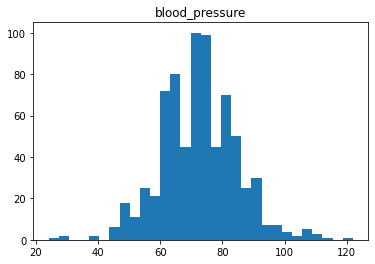

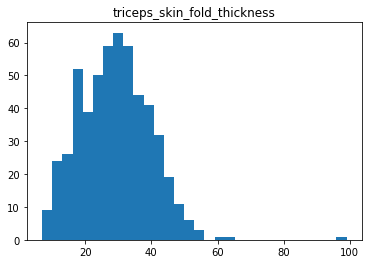

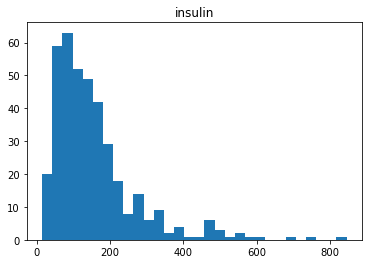

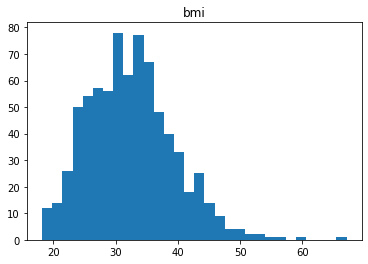

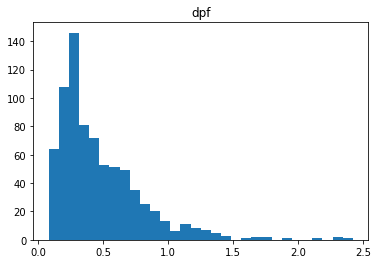

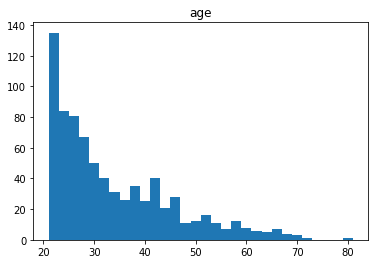

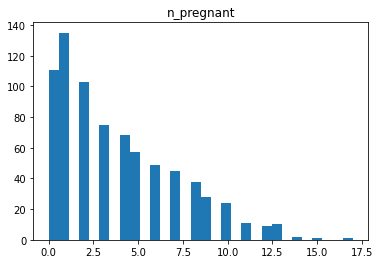

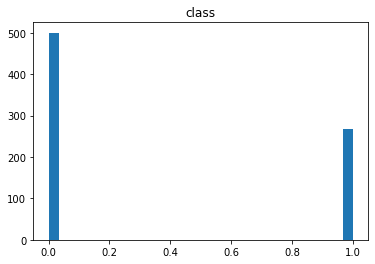

In [64]:
for i in data_new:
    gen_hist(data_new, i)

# Aufgabe 2c
Wie hängen die Merkmale mit der Zielvariable ’class’ zusammen? Fallen dir Merkmale auf, die
bereits klare Hinweise auf das Diabetesrisiko geben? Benutze eine geeignete graphische Darstellung.


Es ist gut zu sehen, dass Personen mit einer hohen "gtt" eine höhere Diabetesrisiko haben

C:\Users\PC\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 40 rows containing missing values.


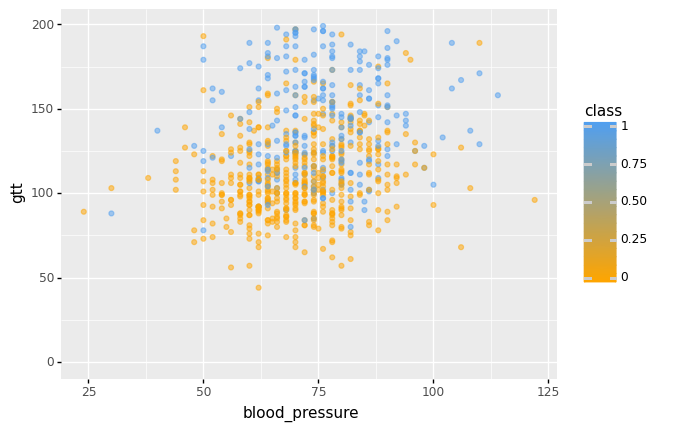

<ggplot: (101741227596)>

In [65]:
(ggplot(data_new, aes(x='blood_pressure', y='gtt', color='class'))
 + geom_point(alpha = 0.5)
 + scale_color_gradient(low='orange', high='#509FF0')
 + expand_limits(y = (0, 130))
 + labs(x='blood_pressure', y='gtt')
)

C:\Users\PC\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 373 rows containing missing values.


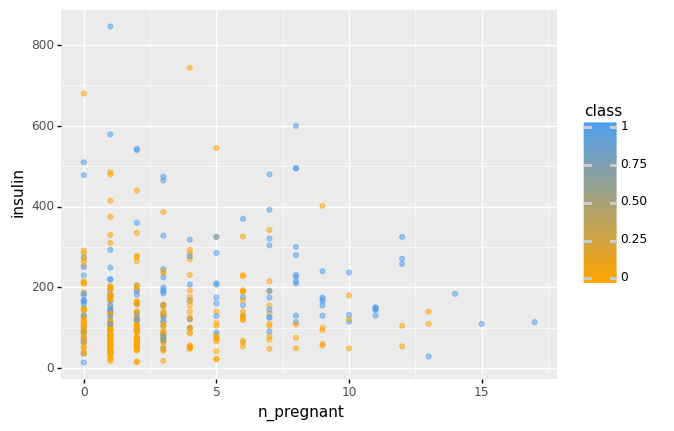

<ggplot: (101741285184)>

In [66]:
(ggplot(data_new, aes(x='n_pregnant', y='insulin', color='class'))
 + geom_point(alpha = 0.5)
 + scale_color_gradient(low='orange', high='#509FF0')
)

C:\Users\PC\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 11 rows containing missing values.


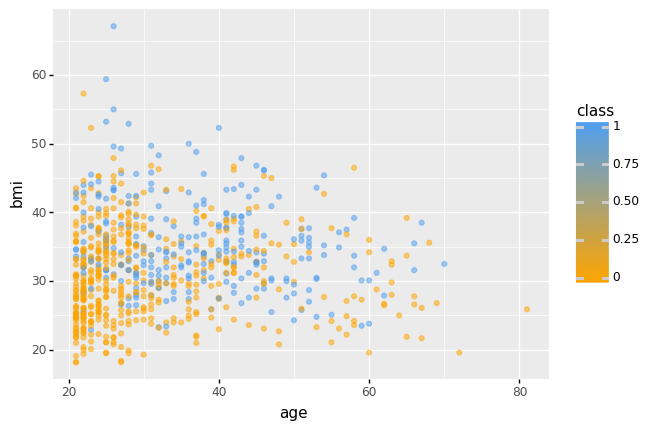

<ggplot: (101739926447)>

In [84]:
(ggplot(data_new, aes(x='age', y='bmi', color='class'))
 + geom_point(alpha = 0.5)
 + scale_color_gradient(low='orange', high='#509FF0')
)

# Aufgabe 2d
Gibt es Merkmale, die untereinander stark korrelieren? Visualisiere dazu die Daten mit einer Scatter
Matrix und berechne die Korrelationsmatrix.


### Korrelationsmatrix
#### Was ist das überhaupt?
Will man einen Zusammenhang zwischen zwei metrischen Variablen untersuchen, zum Beispiel zwischen dem Alter und dem Gewicht von Kindern, so berechnet man eine Korrelation. Diese besteht aus einem Korrelationskoeffizienten und einem p-Wert. Der Korrelationskoeffizient gibt die Stärke und die Richtung des Zusammenhangs an. Er liegt zwischen -1 und 1. 

- Ein Wert nahe -1 bezeichnet einen starken negativen Zusammenhang. 
- Ein Wert nahe 1 spricht für einen starken positiven Zusammenhang. 
- Kein Zusammenhang besteht, wenn der Wert nahe 0 liegt. 

Der p-Wert sagt aus, ob der Korrelationskoeffizient sich signifikant von 0 unterscheidet, ob es also einen signifikanten Zusammenhang gibt. Meistens werden p-Werte kleiner als 0,05 als statistisch signifikant bezeichnet.

**Korrelation:**
- linearer Zusammenhang
- normalverteilte Daten

In [67]:
data_new.corr().round(3)

,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,n_pregnant,class
gtt,1.000,0.223,0.227,0.581,0.233,0.137,0.266,0.128,0.494
blood_pressure,0.223,1.000,0.227,0.098,0.289,-0.003,0.331,0.214,0.171
triceps_skin_fold_thickness,0.227,0.227,1.000,0.185,0.648,0.115,0.166,0.100,0.259
insulin,0.581,0.098,0.185,1.000,0.228,0.130,0.220,0.082,0.303
bmi,0.233,0.289,0.648,0.228,1.000,0.155,0.026,0.022,0.314
dpf,0.137,-0.003,0.115,0.130,0.155,1.000,0.033,-0.034,0.173
age,0.266,0.331,0.166,0.220,0.026,0.033,1.000,0.544,0.236
n_pregnant,0.128,0.214,0.100,0.082,0.022,-0.034,0.544,1.000,0.221
class,0.494,0.171,0.259,0.303,0.314,0.173,0.236,0.221,1.000


#### Bemerkung:
Es gibt praktisch keine Zusammenhänge, abgesehen von die folgenden Korrelationen:
- gtt & insulin: 0.581
- gtt & class: 0.494
- age & n_pregnant: 0.544
- bmi & triceps_skin_fold_thickness: 0.648

### Visualisierungen

C:\Users\PC\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 374 rows containing missing values.


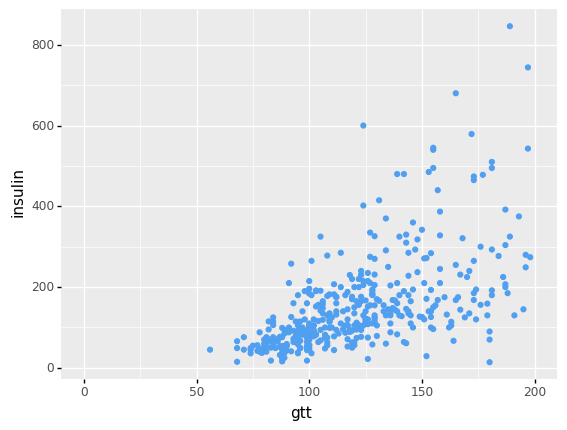

<ggplot: (101739858481)>

In [75]:
(ggplot(data_new, aes(x='gtt', y='insulin'))
 + geom_point(color='#509FF0')
 + expand_limits(x = (0, 200))
)

C:\Users\PC\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 5 rows containing missing values.


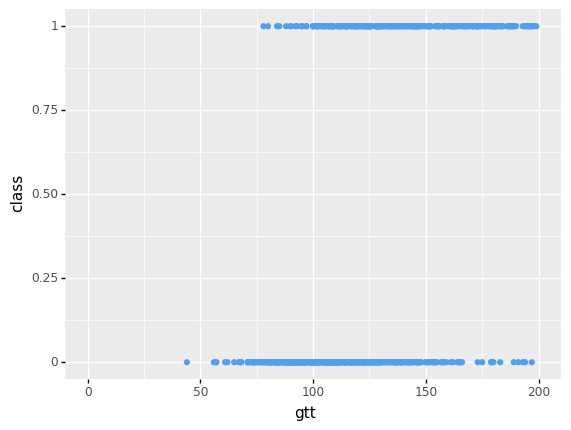

<ggplot: (101740057317)>

In [76]:
(ggplot(data_new, aes(x='gtt', y='class'))
 + geom_point(color='#509FF0')
 + expand_limits(x = (0, 200))
)

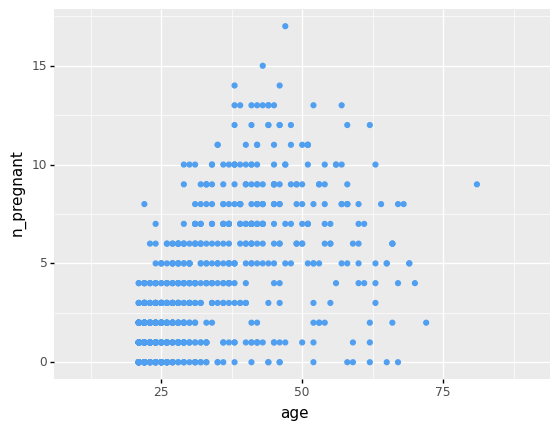

<ggplot: (101741277007)>

In [183]:
(ggplot(data_new, aes(x='age', y='n_pregnant'))
 + geom_point(color='#509FF0')
 + expand_limits(x = (10, 90))
)

C:\Users\PC\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 229 rows containing missing values.


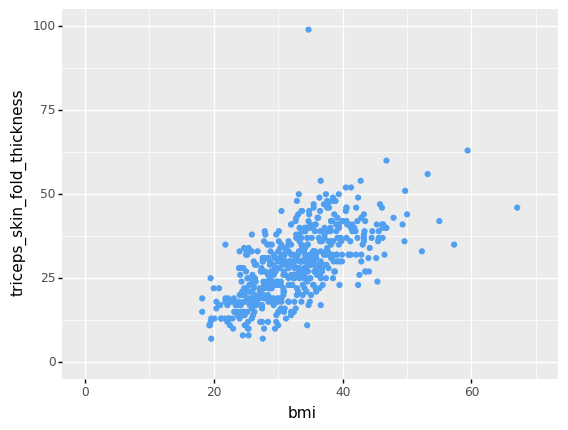

<ggplot: (101741162713)>

In [87]:
(ggplot(data_r, aes(x='bmi', y='triceps_skin_fold_thickness'))
 + geom_point(color='#509FF0')
 + expand_limits(x = (0, 70))
 + expand_limits(y = (0, 100))
)

# Fehlende Werte
## Aufgabe 3a
Quantifiziere die Anzahl der fehlenden Werte pro Merkmal absolut und in Prozent.


In [102]:
len(data_new)

767

In [117]:
def count_nan(df, col):
    nan_count = df[col].isna().sum()
    percent = round(nan_count / len(data_new), 5)
    
    print(col)
    print('nan amount:', nan_count)
    print('nan percent', percent)
    print('')
    
for col in data_new:
    count_nan(data_new, col)

gtt
nan amount: 5
nan percent 0.00652

blood_pressure
nan amount: 35
nan percent 0.04563

triceps_skin_fold_thickness
nan amount: 227
nan percent 0.29596

insulin
nan amount: 373
nan percent 0.48631

bmi
nan amount: 11
nan percent 0.01434

dpf
nan amount: 0
nan percent 0.0

age
nan amount: 0
nan percent 0.0

n_pregnant
nan amount: 0
nan percent 0.0

class
nan amount: 0
nan percent 0.0



## Aufgabe 3b
Hängen die fehlenden Werte mit der Zielvariable ‘class‘ zusammen? D.h. würde bereits das Fehlen
oder Nicht-Fehlen eines Merkmals auf ein erhöhtes oder vermindertes Diabetesrisiko hinweisen?


## Aufgabe 3c
Hängt das Fehlen eines Merkmals vom Fehlen eines anderen Merkmals ab?
Hinweis: Hier kannst du den Zusammenhang zwischen fehlenden Werten zum Beispiel grob prüfen,
indem du überall im Data Frame eine Null setzt, wo der Wert nicht fehlt, und eine Eins setzt, wo
der Wert fehlt, und dann die Korrelationsmatrix berechnest. Das Mass passt zwar nicht perfekt,
aber für erste Analysen reicht es aus.


## Aufgabe 3d
Zum typischen Data Wrangling gehört die Evaluation von Strategien zum Umgang mit fehlenden
Werten. Eine Strategie ist das Entfernen aller Zeilen mit mindestens einem fehlenden Wert. Wieviele
Zeilen müsstest du hier konkret aus dem Datensatz entfernen?

In [162]:
# for each row, add the amount of NaN values to the list
lst = data_new.isna().sum(axis=1).tolist()

# remove all the rows without an NaN value
lst = [i for i in lst if i != 0]

print(len(lst), "Zeilen müssten gelöscht werden")

375 Zeilen müssten gelöscht werden


## Aufgabe 3e
Statt sie zu entfernen möchten wir die fehlenden Werte lieber imputieren. Argumentiere hier kurz, ob du ein Ersetzen mit Durchschnitt oder Median besser findest und erstelle dann ein imputiertes Dataframe.


Durchschnitt: Der Durchschnitt wird für normale Zahlenverteilungen verwendet, welche eine niedrige Anzahl an Ausreißern aufweist.

Median: Der Median wird im Allgemeinen zur Festlegung der zentralen Tendenz von schiefen Zahlenverteilungen verwendet.

Wenn die Daten, die Sie vergleichen, **meist einheitlich verteilt** sind, können Sie sicher den **Durchschnitt** verwenden. Wenn der Nummernsatz jedoch **einige Ausreißer** hat, sollten Sie die Verwendung des **Medianwerts** in Betracht ziehen, um Werte herauszufiltern, die die Resultate verfälschen.

In unserem Fall, sollte der Median verwendet werden, da die Daten einheitlich verteilt sind und es einige Ausreisser gibt.

In [182]:
# fill the median in NaN fields
data_no_nan = data_new.fillna(data_new.median())
data_no_nan

,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,n_pregnant,class
0,85.0,66.0,29.0,125.0,26.6,0.351,31,1,0
1,183.0,64.0,29.0,125.0,23.3,0.672,32,8,1
2,89.0,66.0,23.0,94.0,28.1,0.167,21,1,0
3,137.0,40.0,35.0,168.0,43.1,2.288,33,0,1
4,116.0,74.0,29.0,125.0,25.6,0.201,30,5,0
...,...,...,...,...,...,...,...,...,...
762,101.0,76.0,48.0,180.0,32.9,0.171,63,10,0
763,122.0,70.0,27.0,125.0,36.8,0.340,27,2,0
764,121.0,72.0,23.0,112.0,26.2,0.245,30,5,0
765,126.0,60.0,29.0,125.0,30.1,0.349,47,1,1


## Aufgabe 3f
Statt jedes einzelne Merkmal für sich zu imputieren, kann auch eine modellbasierte Imputationsstrategie benutzt werden, die die Merkmale im Zusammenhang zueinander betrachtet. Suche dir
eine solche Strategie aus (zum Beispiel KNNImputer aus scikit-learn) und erstelle ebenfalls ein
imputiertes Data Frame damit.

In [193]:
# Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. 
# Two samples are close if the features that neither is missing are close.

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
data_imputed = imputer.fit_transform(data_new)

df = pd.DataFrame(data_imputed)
df.columns = ["gtt", "blood_pressure", "triceps_skin_fold_thickness", "insulin", "bmi", "dpf", "age", "n_pregnant", "class"]
df

,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,n_pregnant,class
0,85.0,66.0,29.0,88.5,26.6,0.351,31.0,1.0,0.0
1,183.0,64.0,24.0,227.5,23.3,0.672,32.0,8.0,1.0
2,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1.0,0.0
3,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0.0,1.0
4,116.0,74.0,20.0,111.0,25.6,0.201,30.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...
762,101.0,76.0,48.0,180.0,32.9,0.171,63.0,10.0,0.0
763,122.0,70.0,27.0,202.5,36.8,0.340,27.0,2.0,0.0
764,121.0,72.0,23.0,112.0,26.2,0.245,30.0,5.0,0.0
765,126.0,60.0,33.5,123.5,30.1,0.349,47.0,1.0,1.0


# Erste Erkenntnisse gewinnen
Meistens möchtest du nicht gleich als erstes ein Modell trainieren, sondern zuerst einige grundlegende
Zusammenhänge in deinem Datenset verstehen, damit du nachher auch die Resultate der Modellierung
verstehst. Im Folgenden dazu einige Vorschläge:
## Aufgabe 4a
Was ist das mittlere Diabetesrisiko auf die Anzahl der bereits erlebten Schwangerschaften?


Hinweis: Die Zuverlässigkeit deiner Aussage nimmt mit abnehmender Gruppengrösse ab. Beachte
diese Eigenschaft, wenn du allgemeine Aussagen machst

In [229]:
# Anzahl Personen mit Diabetes, die bereits schwanger waren
lst_diab_preg = df[(df["n_pregnant"] != 0) & (df["class"] == 1)]

print("Total:", len(df))
print("Diabetes & Pregnant:", len(lst_diab_preg))
print("Diabetesrisiko für bereits erlebten Schwangerschaften:", len(lst_diab_preg) / len(df))

Total: 767
Diabetes & Pregnant: 229
Diabetesrisiko für bereits erlebten Schwangerschaften: 0.2985658409387223


## Aufgabe 4b
Die Diabetes Pedigree Function (dpf) berechnet sich aus dem Auftreten von Diabetes im Stammbaum.
Ist sie alleine ein klarer Indikator für das Auftreten von Diabetes im eigenen Leben? Benutze für
deine Untersuchung einen Density-Plot.

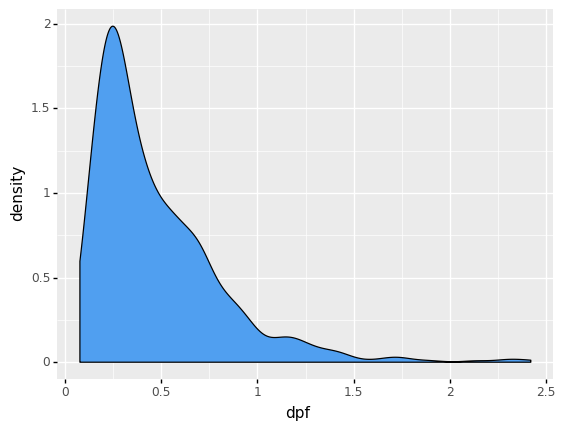

<ggplot: (101743617829)>

In [235]:
(ggplot(df, aes(x=df["dpf"]))
 + geom_density(fill="#509FF0")
)

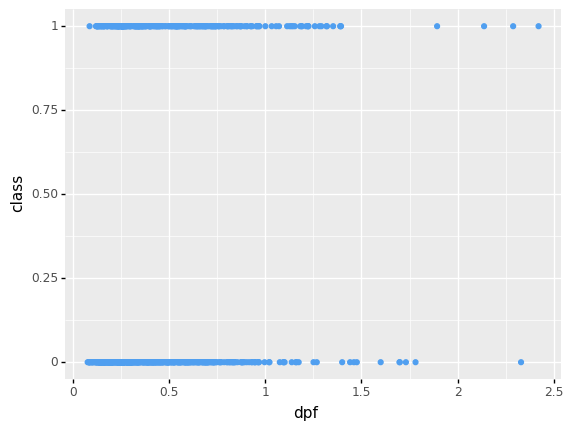

<ggplot: (101739877455)>

In [241]:
(ggplot(data_r, aes(x='dpf', y='class'))
 + geom_point(color='#509FF0')
)

DPF ist kein klarer Indikator für das Auftreten von Diabetes im eigenen Leben, Korrelation mit class: 0.173 und bei den 20 Personen mit den höchsten dpf Werten ist auch keine klare Korrelation zu finden. Aber man tendiert dazu eine höchere Wahrscheinlichkeit Diabetes zu kriegen, wenn der dpf Wert hoch ist (Verglichen mit den 20 tiefsten dpf Werte)

In [251]:
data_new[["dpf", "class"]].sort_values("dpf", ascending = False).tail(20)

,dpf,class
324,0.123,0
328,0.122,0
713,0.121,0
559,0.121,1
703,0.118,0
632,0.115,0
429,0.108,0
526,0.107,0
80,0.102,0
224,0.101,0


## Aufgabe 4c
Wie wirkt sich das Alter auf das Diabetesrisiko aus? Führe hier Altersklassen ab 20 im Abstand von
10 Jahren ein und berechne das durchschnittliche Diabetes-Risiko.

Hinweis: Die Zuverlässigkeit deiner Aussage nimmt wie in a) mit abnehmender Gruppengrösse ab.
Beachte diese Eigenschaft, wenn du allgemeine Aussagen machst.
